In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('data.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df3 = df[['ejection_fraction','platelets','serum_creatinine','age','creatinine_phosphokinase','DEATH_EVENT']]

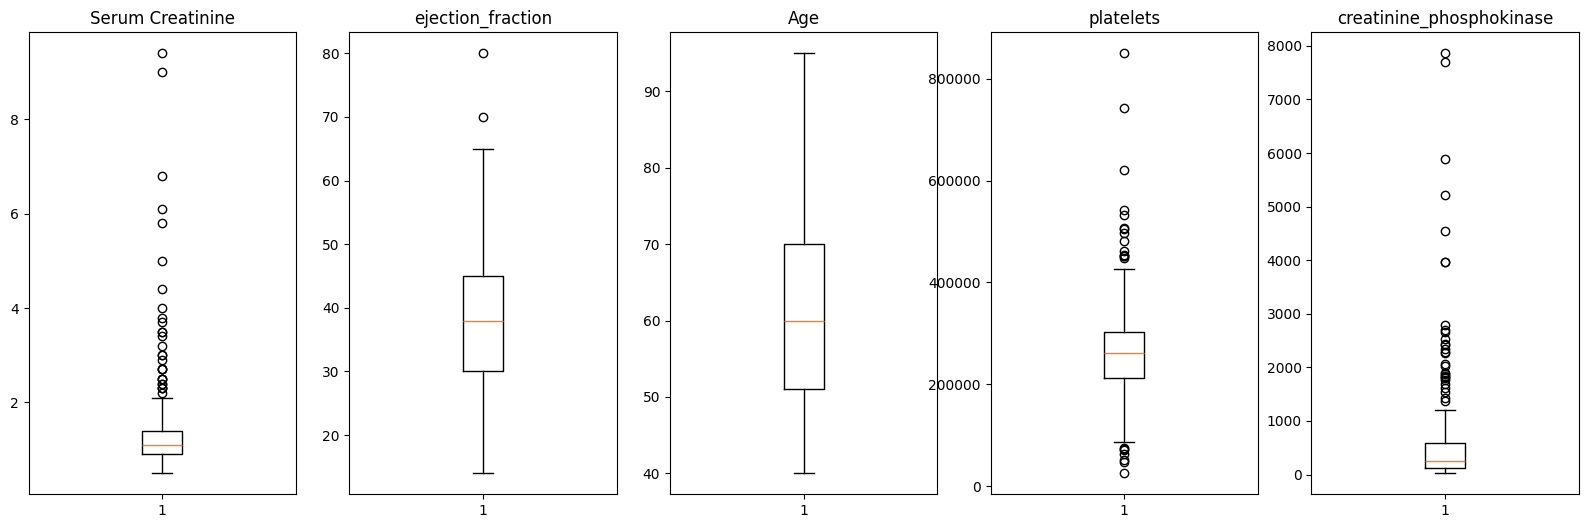

In [5]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,6))

ax1.boxplot(df["serum_creatinine"])
ax1.set_title("Serum Creatinine")


ax2.boxplot(df["ejection_fraction"])
ax2.set_title("ejection_fraction")

ax3.boxplot(df["age"])
ax3.set_title("Age")

ax4.boxplot(df["platelets"])
ax4.set_title("platelets")

ax5.boxplot(df["creatinine_phosphokinase"])
ax5.set_title("creatinine_phosphokinase")


plt.show()


In [6]:
from scipy import stats
from scipy.stats import zscore

In [7]:
z_score_serum_creatinine = zscore(df["serum_creatinine"])

for threshold in np.arange(0, 4.25, 0.25):
    print("Threshold Value: {}".format(threshold))
    print("Outliers: {}".format(len(np.where(z_score_serum_creatinine > threshold)[0])))
    print("--------------------")

Threshold Value: 0.0
Outliers: 81
--------------------
Threshold Value: 0.25
Outliers: 61
--------------------
Threshold Value: 0.5
Outliers: 35
--------------------
Threshold Value: 0.75
Outliers: 29
--------------------
Threshold Value: 1.0
Outliers: 23
--------------------
Threshold Value: 1.25
Outliers: 20
--------------------
Threshold Value: 1.5
Outliers: 16
--------------------
Threshold Value: 1.75
Outliers: 13
--------------------
Threshold Value: 2.0
Outliers: 12
--------------------
Threshold Value: 2.25
Outliers: 9
--------------------
Threshold Value: 2.5
Outliers: 8
--------------------
Threshold Value: 2.75
Outliers: 7
--------------------
Threshold Value: 3.0
Outliers: 6
--------------------
Threshold Value: 3.25
Outliers: 6
--------------------
Threshold Value: 3.5
Outliers: 5
--------------------
Threshold Value: 3.75
Outliers: 5
--------------------
Threshold Value: 4.0
Outliers: 5
--------------------


In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df3.drop(columns=['DEATH_EVENT'])
y = df3['DEATH_EVENT']
class_counts = y.value_counts()
target_count = min(class_counts)

over_sampler = RandomOverSampler(sampling_strategy='minority',random_state=0)  
under_sampler = RandomUnderSampler(sampling_strategy='majority',random_state=0)  

# Apply resampling
X_over, y_over = over_sampler.fit_resample(X, y)
X_resampled, y_resampled = under_sampler.fit_resample(X_over, y_over)

df3_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['DEATH_EVENT'])], axis=1)

In [15]:
df3_resampled.head()

,ejection_fraction,platelets,serum_creatinine,age,creatinine_phosphokinase,DEATH_EVENT
81,50,263358.03,1.18,67.0,582,0
114,40,328000.00,1.20,60.0,754,0
99,40,221000.00,1.10,63.0,61,0
103,30,226000.00,1.00,42.0,5209,0
198,20,279000.00,1.00,50.0,582,0


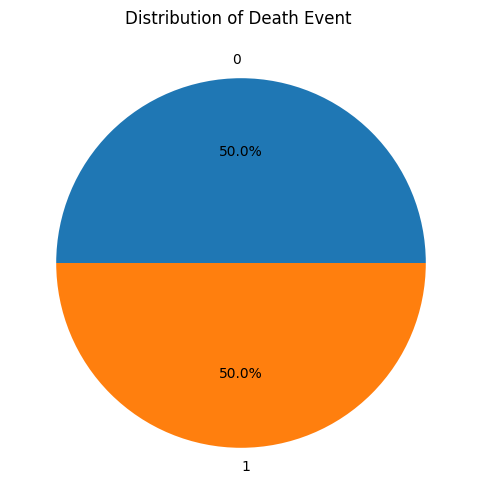

In [16]:
fig, ax=plt.subplots(figsize = (8,6))
counts = list(df3_resampled['DEATH_EVENT'].value_counts())
labels = list(df3_resampled['DEATH_EVENT'].value_counts().index)

# Plot a pie chart of Death Event
ax.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title(f'Distribution of Death Event ')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

#Preparing the data
X = df3_resampled.drop(columns=['DEATH_EVENT']).values
y = df3_resampled['DEATH_EVENT'].values
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)
#rf_classifier = RandomForestClassifier(criterion = 'gini',n_estimators=160,random_state=0)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer, QuantileTransformer

In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85        62
           1       0.80      0.98      0.88        60

    accuracy                           0.87       122
   macro avg       0.89      0.87      0.87       122
weighted avg       0.89      0.87      0.87       122

Confusion Matrix:
 [[47 15]
 [ 1 59]]


In [21]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

In [22]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
extra_tree_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [23]:
# Train and evaluate AdaBoost
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print("AdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_pred))
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))

AdaBoost Accuracy: 0.7786885245901639
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        62
           1       0.74      0.85      0.79        60

    accuracy                           0.78       122
   macro avg       0.78      0.78      0.78       122
weighted avg       0.79      0.78      0.78       122

AdaBoost Confusion Matrix:
 [[44 18]
 [ 9 51]]


In [24]:
extra_tree_model.fit(X_train, y_train)
extra_tree_pred = extra_tree_model.predict(X_test)
extra_tree_accuracy = accuracy_score(y_test, extra_tree_pred)
print("ExtraTrees Accuracy:", extra_tree_accuracy)
print("ExtraTrees Classification Report:\n", classification_report(y_test, extra_tree_pred))
print("ExtraTrees Confusion Matrix:\n", confusion_matrix(y_test, extra_tree_pred))

ExtraTrees Accuracy: 0.8688524590163934
ExtraTrees Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85        62
           1       0.80      0.98      0.88        60

    accuracy                           0.87       122
   macro avg       0.89      0.87      0.87       122
weighted avg       0.89      0.87      0.87       122

ExtraTrees Confusion Matrix:
 [[47 15]
 [ 1 59]]


In [28]:
from xgboost import XGBClassifier

In [29]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))

C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:29:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8442622950819673
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83        62
           1       0.77      0.97      0.86        60

    accuracy                           0.84       122
   macro avg       0.87      0.85      0.84       122
weighted avg       0.87      0.84      0.84       122

XGBoost Confusion Matrix:
 [[45 17]
 [ 2 58]]


In [30]:
import pickle

In [32]:
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
